In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [ ]:
def distance(X, x_test):
    return np.sqrt(np.sum((X - x_test) ** 2, axis=1))

In [ ]:
def knn(X, x_test, y, k):
    dist = distance(X, x_test)
    nn = []
    tmp = max(dist)
    
    for _ in range(k):
        idx = np.argmin(dist)
        nn.append([y[idx], dist[idx], *X[idx]])
        dist[idx] = tmp
    return np.array(nn)

In [ ]:
def ball_tree(X, y, x_test, depth, d, k):
    if X.shape[0] < k:
        return None
    if d == depth:
        return knn(X, x_test, y, k)
    
    mid_point = np.mean(X, axis=0)
    x_1 = X[np.argmax(distance(X, mid_point))]
    x_2 = X[np.argmax(distance(X, x_1))]

    proj = X.dot((x_2 - x_1).T)
    x_test_proj = x_test.dot((x_2 - x_1).T)
    median_proj = np.median(proj)
    
    indices = (proj >= median_proj) if x_test_proj >= median_proj else (proj < median_proj)
    nn = ball_tree(X[indices], y[indices], x_test, depth, d+1, k)
    if nn is None:
        return knn(X, x_test, y, k)
    
    mid_opposite_ball = np.mean(X[~indices], axis=0, keepdims=True)
    rad_opposite_ball = np.max(distance(X[~indices], mid_opposite_ball))

    if nn[-1, 1] <= (distance(x_test, mid_opposite_ball) - rad_opposite_ball):
        return nn
    nn_2 = ball_tree(X[~indices], y[~indices], x_test, depth, d+1, k)
    if nn_2 is None:
        return nn
    for i in range(k):
        for j in range(k):
            if nn[i, 1] > nn_2[j, 1]:
                nn[[i]], nn_2[[j]] = nn_2[[j]], nn[[i]]
    return nn

***********************************************
POINT: [1.5 0.5]
NEAREST NEIGHBORS:
[[0.         0.10779176 1.49172313 0.60747352]
 [0.         0.11643866 1.60054424 0.44127335]
 [0.         0.31519105 1.33664505 0.23044377]]

***********************************************
***********************************************
POINT: [3.7 1.3]
NEAREST NEIGHBORS:
[[1.         0.11625935 3.60886739 1.22781217]
 [1.         0.18512583 3.54248744 1.39726957]
 [1.         0.25027585 3.80116475 1.07108147]]

***********************************************
***********************************************
POINT: [6.5 2.1]
NEAREST NEIGHBORS:
[[2.         0.12969725 6.6287123  2.11595368]
 [2.         0.14465042 6.39522289 2.00027286]
 [2.         0.26735922 6.76731457 2.10488601]]

***********************************************
***********************************************
POINT: [4.8 1.7]
NEAREST NEIGHBORS:
[[2.         0.09734672 4.73438087 1.77190627]
 [2.         0.10252331 4.7030877  1.733452 

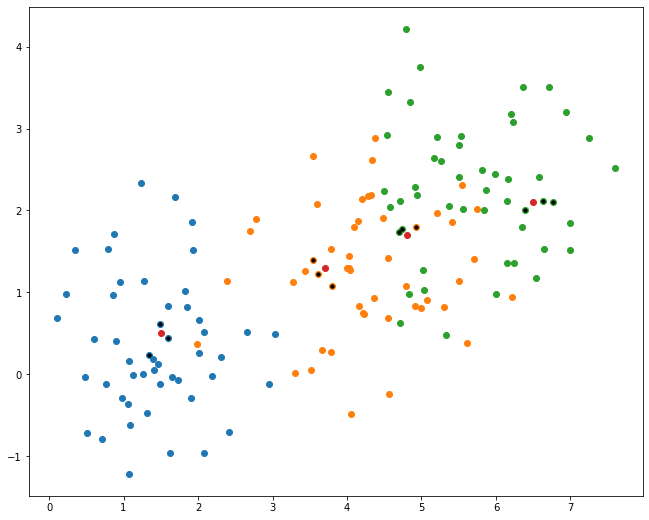

In [ ]:
iris = datasets.load_iris()
X = iris.data[:, 2:]
# np.random.seed(42)
X += 0.75 * np.random.randn(150, 2) # some noise

y = iris.target
x_test = np.array([[1.5, 0.5], [3.7, 1.3], [6.5, 2.1], [4.8, 1.7]])
#x_test = np.array([[4.14670398, 1.1]])

plt.figure(figsize=(11, 9))
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.scatter(X[y == 2, 0], X[y == 2, 1])
plt.scatter(x_test[:, 0], x_test[:, 1])

for point in x_test:
    ans = ball_tree(X, y, point, 5, 1, 3)
    print("***********************************************")
    print("POINT: {}".format(point))
    print("NEAREST NEIGHBORS:\n{}".format(ans), end='\n\n')
    print("***********************************************")
    plt.scatter(ans[:, 2], ans[:, 3], color='black', s=11)
plt.show()